# NAML project - Stroke prediction
###  Cavallini - Eusebio

In [287]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [288]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [289]:
new_cols = ["id", "gender", "age", "hypertension", "heart-disease", "ever-married", "work-type", "Residence-type", "avg-glucose-level", "bmi", "smoking-status", "stroke"]

cathegorical_features = ['work-type', 'smoking-status']
binary_features = ['hypertension', 'heart-disease', 'gender', 'ever-married', 'Residence-type']
numerical_features = ['age', 'avg-glucose-level', 'bmi']

df.columns = new_cols

In [290]:
df.head()

,id,gender,age,hypertension,heart-disease,ever-married,work-type,Residence-type,avg-glucose-level,bmi,smoking-status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [291]:
df.drop('id', axis=1, inplace=True) # drop id column because it is not useful

In [292]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart-disease      5110 non-null   int64  
 4   ever-married       5110 non-null   object 
 5   work-type          5110 non-null   object 
 6   Residence-type     5110 non-null   object 
 7   avg-glucose-level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking-status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


## Data Pre-processing

In [293]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart-disease          0
ever-married           0
work-type              0
Residence-type         0
avg-glucose-level      0
bmi                  201
smoking-status         0
stroke                 0
dtype: int64

In [294]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart-disease          0
ever-married           0
work-type              0
Residence-type         0
avg-glucose-level      0
bmi                  201
smoking-status         0
stroke                 0
dtype: int64

In [295]:
df = df[df['smoking-status'] != 'Unknown'] # drop rows with unknown smoking status

In the paper the missing nan values were removed, in this version a better practice would be to impute their values with the mean of the column. This is done in the following code.

In [296]:
df['bmi'].fillna(df['bmi'].mean(), inplace=True) # fill missing values in bmi column with the mean of the column

C:\Users\hp\AppData\Local\Temp\ipykernel_6032\2820060641.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(df['bmi'].mean(), inplace=True) # fill missing values in bmi column with the mean of the column


In [297]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart-disease        0
ever-married         0
work-type            0
Residence-type       0
avg-glucose-level    0
bmi                  0
smoking-status       0
stroke               0
dtype: int64

In [298]:
df = df[df['age'] >= 18]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3392 entries, 0 to 5108
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             3392 non-null   object 
 1   age                3392 non-null   float64
 2   hypertension       3392 non-null   int64  
 3   heart-disease      3392 non-null   int64  
 4   ever-married       3392 non-null   object 
 5   work-type          3392 non-null   object 
 6   Residence-type     3392 non-null   object 
 7   avg-glucose-level  3392 non-null   float64
 8   bmi                3392 non-null   float64
 9   smoking-status     3392 non-null   object 
 10  stroke             3392 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 318.0+ KB


In the paper is clearly stated that only the patients above 18 years old were considered. We have removed the patients below 18 years old.

In [299]:
df['smoking-status'].value_counts()

smoking-status
never smoked       1752
formerly smoked     860
smokes              780
Name: count, dtype: int64

In [300]:
df.loc[df['gender'] == 'Other', 'gender'] = 'Female'
df['gender'].value_counts()

gender
Female    2065
Male      1327
Name: count, dtype: int64

In the paper the 'Other' label was removed, instead we have decided to impute the missing values with the most frequent value of the column.

In [301]:
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3392 entries, 0 to 5108
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             3392 non-null   object 
 1   age                3392 non-null   float64
 2   hypertension       3392 non-null   int64  
 3   heart-disease      3392 non-null   int64  
 4   ever-married       3392 non-null   object 
 5   work-type          3392 non-null   object 
 6   Residence-type     3392 non-null   object 
 7   avg-glucose-level  3392 non-null   float64
 8   bmi                3392 non-null   float64
 9   smoking-status     3392 non-null   object 
 10  stroke             3392 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 318.0+ KB


We filter out also the patients whose gender and smoking status are unknown. This to reducce the uncertainty in the data.

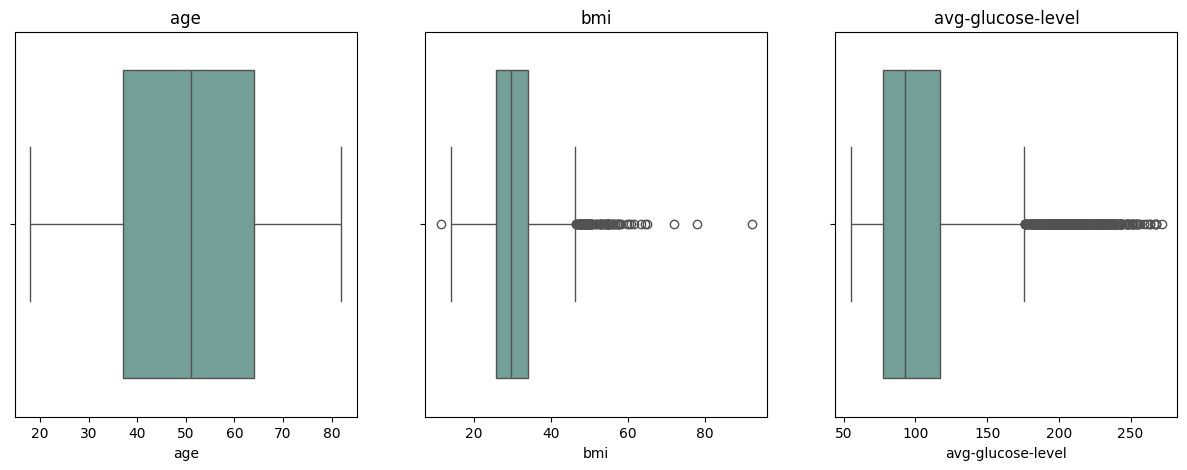

In [302]:
num_cols = ['age','bmi','avg-glucose-level']

plt.figure(figsize=(15, 5))
for i in range(3) :
    plt.subplot(1,3,i+1)

    sns.boxplot(x=df[num_cols[i]],color='#6DA59D')
    plt.title(num_cols[i])
plt.show()

In the paper, the autors have removed the single lowest bmi value. We have done the same.

In [303]:
df = df[df['bmi'] > 16] # drop rows with bmi less than 16
df = df[df['bmi'] < 45] # drop rows with bmi greater than 60
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3263 entries, 0 to 5108
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             3263 non-null   object 
 1   age                3263 non-null   float64
 2   hypertension       3263 non-null   int64  
 3   heart-disease      3263 non-null   int64  
 4   ever-married       3263 non-null   object 
 5   work-type          3263 non-null   object 
 6   Residence-type     3263 non-null   object 
 7   avg-glucose-level  3263 non-null   float64
 8   bmi                3263 non-null   float64
 9   smoking-status     3263 non-null   object 
 10  stroke             3263 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 305.9+ KB


In [304]:
df = df[df['avg-glucose-level'] > 50] # drop rows with bmi less than 16
df = df[df['avg-glucose-level'] < 145] # drop rows with bmi greater than 60
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2699 entries, 2 to 5107
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             2699 non-null   object 
 1   age                2699 non-null   float64
 2   hypertension       2699 non-null   int64  
 3   heart-disease      2699 non-null   int64  
 4   ever-married       2699 non-null   object 
 5   work-type          2699 non-null   object 
 6   Residence-type     2699 non-null   object 
 7   avg-glucose-level  2699 non-null   float64
 8   bmi                2699 non-null   float64
 9   smoking-status     2699 non-null   object 
 10  stroke             2699 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 253.0+ KB


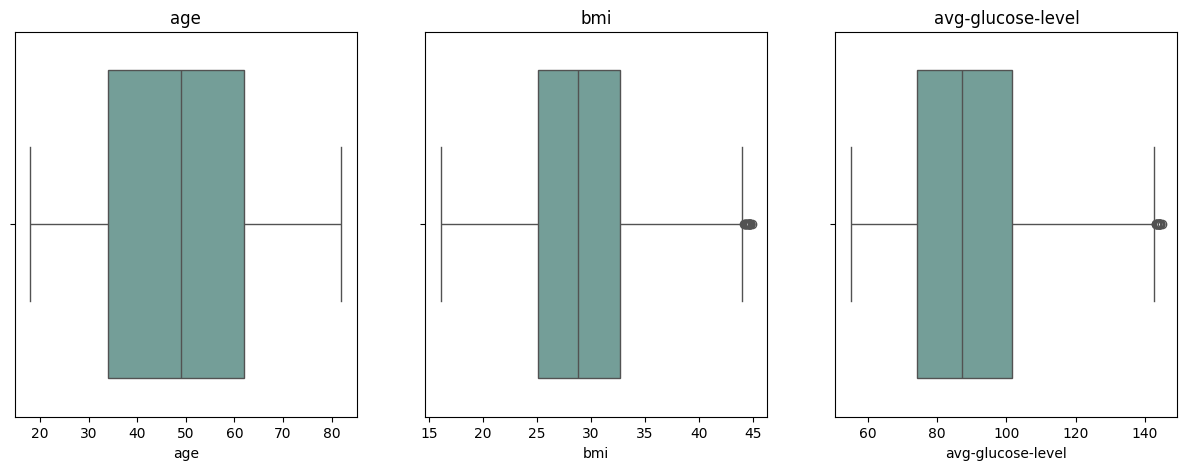

In [305]:
num_cols = ['age','bmi','avg-glucose-level']

plt.figure(figsize=(15, 5))
for i in range(3) :
    plt.subplot(1,3,i+1)

    sns.boxplot(x=df[num_cols[i]],color='#6DA59D')
    plt.title(num_cols[i])
plt.show()

## Exploratory Data Analysis

In [306]:
stroke_count =df['stroke'].value_counts() # pandas serie, it contains the number of '1' (stroke) and the number of '0' (no stroke)
print("Stroke percentage: {:.2f}%".format(100 * (stroke_count[1] / (stroke_count[0] + stroke_count[1]))))

Stroke percentage: 4.67%


In [307]:
gender_count = df['gender'].value_counts()
print('Number of males: ', gender_count['Male'])
print('Number of females: ', gender_count['Female'])

Number of males:  1029
Number of females:  1670


In [308]:
hypertension_count =df['hypertension'].value_counts()
print("Hypertension percentage: {:.2f}%".format(100 *( hypertension_count[1]/(hypertension_count[0]+hypertension_count[1]))))

Hypertension percentage: 10.30%


In [309]:
heart_disease_count =df['heart-disease'].value_counts()
print("Hearth disease percentage: {:.2f}%".format(100 * (heart_disease_count[1]/(heart_disease_count[0]+heart_disease_count[1]))))

Hearth disease percentage: 5.11%


In [310]:
ever_married_count =df['ever-married'].value_counts()
print("Married percentage: {:.2f}%".format(100 * (ever_married_count[0]/(ever_married_count[0]+ever_married_count[1]))))

Married percentage: 77.77%


C:\Users\hp\AppData\Local\Temp\ipykernel_6032\140164340.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Married percentage: {:.2f}%".format(100 * (ever_married_count[0]/(ever_married_count[0]+ever_married_count[1]))))


In [311]:
work_type_count =df['work-type'].value_counts()
print("Private percentage: {:.2f}%".format(100 * (work_type_count[0]/(work_type_count[0]+work_type_count[1]+work_type_count[2]+work_type_count[3]))))
print("Self-employed percentage: {:.2f}%".format(100 * (work_type_count[1]/(work_type_count[0]+work_type_count[1]+work_type_count[2]+work_type_count[3]))))
print("Gov percentage: {:.2f}%".format(100 * (work_type_count[2]/(work_type_count[0]+work_type_count[1]+work_type_count[2]+work_type_count[3]))))
print("Never Worked fraction: {:.1f}%".format(100 * (work_type_count[3]/(work_type_count[0]+work_type_count[1]+work_type_count[2]+work_type_count[3]))))

Private percentage: 65.73%
Self-employed percentage: 18.64%
Gov percentage: 15.52%
Never Worked fraction: 0.1%


C:\Users\hp\AppData\Local\Temp\ipykernel_6032\2819490883.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Private percentage: {:.2f}%".format(100 * (work_type_count[0]/(work_type_count[0]+work_type_count[1]+work_type_count[2]+work_type_count[3]))))
C:\Users\hp\AppData\Local\Temp\ipykernel_6032\2819490883.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Self-employed percentage: {:.2f}%".format(100 * (work_type_count[1]/(work_type_count[0]+work_type_count[1]+work_type_count[2]+work_type_count[3]))))
C:\Users\hp\AppData\Local\Temp\ipykernel_6032\2819490883.py:4: FutureWarning: Series.__getitem__ tre

In [312]:
residence_type_count =df['Residence-type'].value_counts()
print("Urban percentage: {:.2f}%".format(100 * (residence_type_count[0]/(residence_type_count[0]+residence_type_count[1]))))
print("Rural pergentage: {:.2f}%".format(100 * (residence_type_count[1]/(residence_type_count[0]+residence_type_count[1]))))

Urban percentage: 51.06%
Rural pergentage: 48.94%


C:\Users\hp\AppData\Local\Temp\ipykernel_6032\159459921.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Urban percentage: {:.2f}%".format(100 * (residence_type_count[0]/(residence_type_count[0]+residence_type_count[1]))))
C:\Users\hp\AppData\Local\Temp\ipykernel_6032\159459921.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Rural pergentage: {:.2f}%".format(100 * (residence_type_count[1]/(residence_type_count[0]+residence_type_count[1]))))


In [313]:
smoking_status_count =df['smoking-status'].value_counts()
print("Never Smoked fraction: {:.2f}%".format(100 * (smoking_status_count[0]/(smoking_status_count[0]+smoking_status_count[1]+smoking_status_count[2]))))
print("Formely Smoked fraction: {:.2f}%".format(100 * (smoking_status_count[1]/(smoking_status_count[0]+smoking_status_count[1]+smoking_status_count[2]))))
print("Smokes fraction: {:.2f}%".format(100 * (smoking_status_count[2]/(smoking_status_count[0]+smoking_status_count[1]+smoking_status_count[2]))))

Never Smoked fraction: 52.17%
Formely Smoked fraction: 24.23%
Smokes fraction: 23.60%


C:\Users\hp\AppData\Local\Temp\ipykernel_6032\4037653718.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Never Smoked fraction: {:.2f}%".format(100 * (smoking_status_count[0]/(smoking_status_count[0]+smoking_status_count[1]+smoking_status_count[2]))))
C:\Users\hp\AppData\Local\Temp\ipykernel_6032\4037653718.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Formely Smoked fraction: {:.2f}%".format(100 * (smoking_status_count[1]/(smoking_status_count[0]+smoking_status_count[1]+smoking_status_count[2]))))
C:\Users\hp\AppData\Local\Temp\ipykernel_6032\4037653718.py:4: FutureWarning: Series.__getitem__

The percentages showed above are exactly the same as the ones in the paper.

In [314]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2699 entries, 2 to 5107
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             2699 non-null   object 
 1   age                2699 non-null   float64
 2   hypertension       2699 non-null   int64  
 3   heart-disease      2699 non-null   int64  
 4   ever-married       2699 non-null   object 
 5   work-type          2699 non-null   object 
 6   Residence-type     2699 non-null   object 
 7   avg-glucose-level  2699 non-null   float64
 8   bmi                2699 non-null   float64
 9   smoking-status     2699 non-null   object 
 10  stroke             2699 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 253.0+ KB


In [315]:
df.head()

,gender,age,hypertension,heart-disease,ever-married,work-type,Residence-type,avg-glucose-level,bmi,smoking-status,stroke
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
6,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
10,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1
11,Female,61.0,0,1,Yes,Govt_job,Rural,120.46,36.8,smokes,1


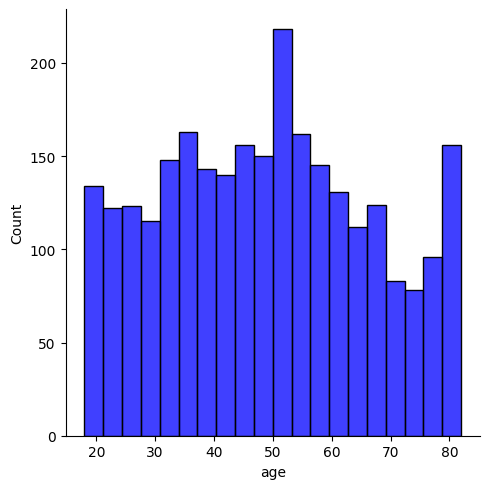

In [316]:
sns.displot(df['age'], bins=20, kde=False, color='blue')

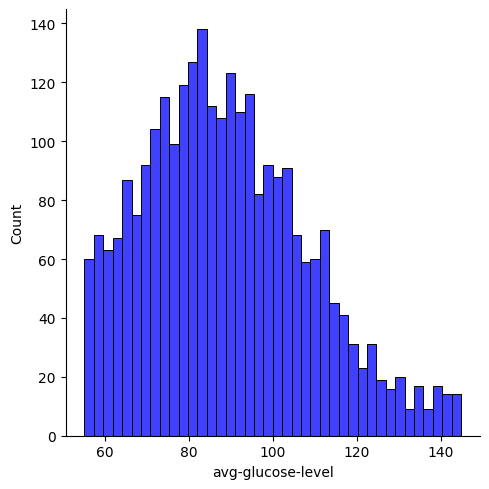

In [317]:
sns.displot(df['avg-glucose-level'], bins=40, kde=False, color='blue')

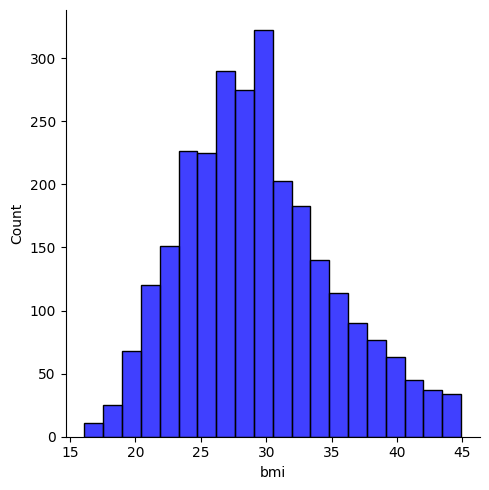

In [318]:
sns.displot(df['bmi'], bins=20, kde=False, color='blue')

### Oversampling

In [319]:
features = np.array(df.columns[:-1])
print(features)

X = df.drop(['stroke'], axis = 1) # Data
y = df['stroke'] # Target

['gender' 'age' 'hypertension' 'heart-disease' 'ever-married' 'work-type'
 'Residence-type' 'avg-glucose-level' 'bmi' 'smoking-status']


In [320]:
y.value_counts()

stroke
0    2573
1     126
Name: count, dtype: int64

<AxesSubplot:ylabel='count'>

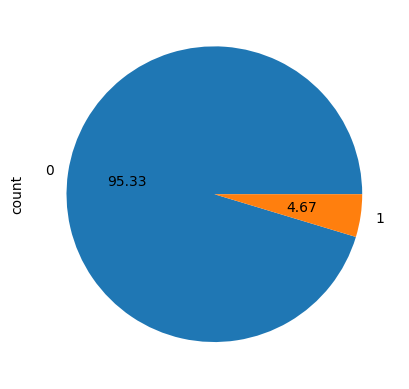

In [321]:
y.value_counts().plot.pie(autopct = "%.2f")

We can clearly see that there is a disproportion between the number of smokers and non-smokers. This is a problem because the model could be biased towards the non-smokers. We will try to balance the dataset by oversampling the smokers.

In [322]:
X.head()

,gender,age,hypertension,heart-disease,ever-married,work-type,Residence-type,avg-glucose-level,bmi,smoking-status
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked
6,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked
7,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked
10,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked
11,Female,61.0,0,1,Yes,Govt_job,Rural,120.46,36.8,smokes


Train-Test Split

It is usually recommended to perform the oversampling only on the train dataset, therefore we will split the dataset into train and test and then oversample the train dataset.

In [323]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) # the data is split into 80% training and 20% testing randomly

In [324]:
X_train.head()

,gender,age,hypertension,heart-disease,ever-married,work-type,Residence-type,avg-glucose-level,bmi,smoking-status
2753,Female,18.0,0,0,No,Private,Urban,123.66,22.2,never smoked
1461,Female,21.0,0,0,No,Private,Rural,107.98,26.9,never smoked
4408,Male,81.0,0,0,Yes,Private,Rural,92.96,22.2,never smoked
1613,Female,73.0,0,0,No,Govt_job,Urban,62.99,25.4,formerly smoked
4947,Female,44.0,0,0,Yes,Private,Urban,84.07,21.2,smokes


Applying the oversampling SMOTE technique. In the paper the authors have oversampled the whole dataset, we will oversample only the train dataset.

Moreover we will use a different version of SMOTE, the SMOTENC, which is more suitable for datasets with categorical features.

In [325]:
from imblearn.over_sampling import SMOTE, SMOTENC
from sklearn.preprocessing import OrdinalEncoder, RobustScaler

X_tmp = X_train.copy()
y_tmp = y_train.copy()

# Apply SMOTE
smote = SMOTENC(sampling_strategy='minority', categorical_features=['work-type', 'smoking-status', 'gender', 'ever-married', 'Residence-type', 'hypertension', 'heart-disease'])
X_smote, y_smote = smote.fit_resample(X_tmp, y_tmp)

X_smote.describe()

,age,hypertension,heart-disease,avg-glucose-level,bmi
count,4110.000000,4110.000000,4110.000000,4110.000000,4110.000000
mean,58.037981,0.109246,0.045012,88.674141,28.976101
std,18.150718,0.311985,0.207356,19.275978,4.794100
min,18.000000,0.000000,0.000000,55.220000,16.100000
25%,45.000000,0.000000,0.000000,73.834723,25.800000
50%,59.996485,0.000000,0.000000,86.663185,28.762437
75%,76.000000,0.000000,0.000000,101.520000,31.400000
max,82.000000,1.000000,1.000000,144.900000,44.900000


In [326]:
X_smote['work-type'].value_counts()

work-type
Private          2777
Self-employed     982
Govt_job          349
Never_worked        2
Name: count, dtype: int64

In [327]:
X_smote.head()

,gender,age,hypertension,heart-disease,ever-married,work-type,Residence-type,avg-glucose-level,bmi,smoking-status
0,Female,18.0,0,0,No,Private,Urban,123.66,22.2,never smoked
1,Female,21.0,0,0,No,Private,Rural,107.98,26.9,never smoked
2,Male,81.0,0,0,Yes,Private,Rural,92.96,22.2,never smoked
3,Female,73.0,0,0,No,Govt_job,Urban,62.99,25.4,formerly smoked
4,Female,44.0,0,0,Yes,Private,Urban,84.07,21.2,smokes


In [328]:
X_balanced = X_smote.copy()
y_balanced = y_smote.copy()

X_train = X_smote.copy()
y_train = y_smote.copy()

# after oversampling the hypertension and heart-disease cathegory have become of type 'object'
X_train['hypertension'] = X_train['hypertension'].astype(int)
X_train['heart-disease'] = X_train['heart-disease'].astype(int)

In [329]:
df_balanced = X_balanced
df_balanced['stroke'] = y_balanced
df_balanced.head()

,gender,age,hypertension,heart-disease,ever-married,work-type,Residence-type,avg-glucose-level,bmi,smoking-status,stroke
0,Female,18.0,0,0,No,Private,Urban,123.66,22.2,never smoked,0
1,Female,21.0,0,0,No,Private,Rural,107.98,26.9,never smoked,0
2,Male,81.0,0,0,Yes,Private,Rural,92.96,22.2,never smoked,0
3,Female,73.0,0,0,No,Govt_job,Urban,62.99,25.4,formerly smoked,0
4,Female,44.0,0,0,Yes,Private,Urban,84.07,21.2,smokes,0


In [330]:
df_balanced.describe()

,age,hypertension,heart-disease,avg-glucose-level,bmi,stroke
count,4110.000000,4110.000000,4110.000000,4110.000000,4110.000000,4110.000000
mean,58.037981,0.109246,0.045012,88.674141,28.976101,0.500000
std,18.150718,0.311985,0.207356,19.275978,4.794100,0.500061
min,18.000000,0.000000,0.000000,55.220000,16.100000,0.000000
25%,45.000000,0.000000,0.000000,73.834723,25.800000,0.000000
50%,59.996485,0.000000,0.000000,86.663185,28.762437,0.500000
75%,76.000000,0.000000,0.000000,101.520000,31.400000,1.000000
max,82.000000,1.000000,1.000000,144.900000,44.900000,1.000000


### Graphs

<AxesSubplot:xlabel='stroke', ylabel='count'>

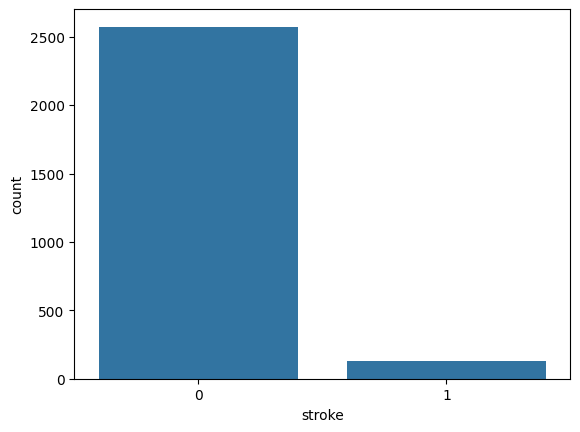

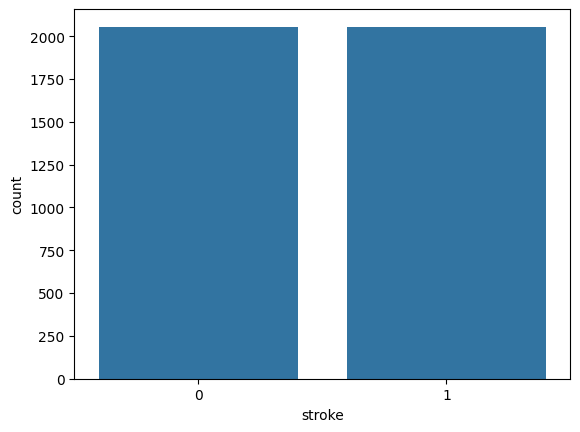

In [331]:
sns.countplot(x='stroke', data=df)
plt.figure()
sns.countplot(x='stroke', data=df_balanced)

We can clearly see that the dataset is now balanced. The stroke and non-stroke patients are now equally represented in the train dataset.

<AxesSubplot:xlabel='age_bucket', ylabel='percent'>

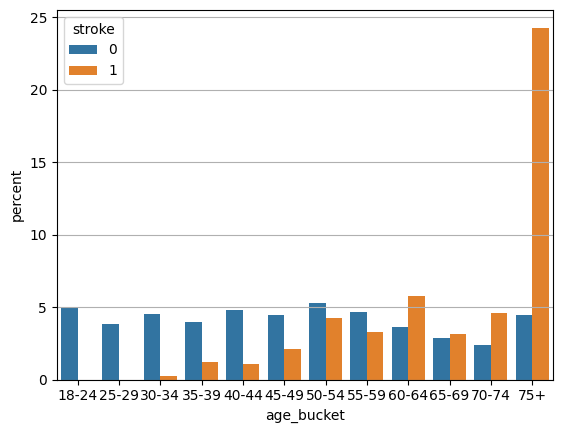

In [332]:
plt.grid()
age_labels = ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75+']
dataset_bal_copy = df_balanced.copy()
dataset_bal_copy['age_bucket'] = pd.cut(dataset_bal_copy['age'], bins=[17, 24, 29, 34, 39, 44, 49, 54, 59, 64, 69, 74, 100], labels=age_labels)
sns.countplot(x='age_bucket', hue='stroke', order=age_labels, data=dataset_bal_copy, stat='percent')

As also observed in the paper, the number of elderly patients who had a stroke is higher than the number of young patients who had a stroke. This is a common observation in the medical field.

<AxesSubplot:xlabel='hypertension', ylabel='percent'>

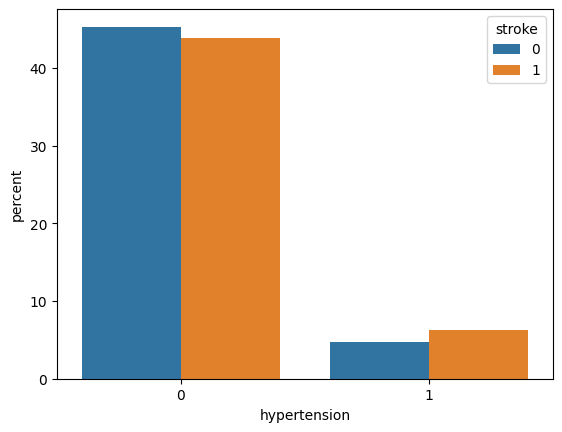

In [333]:
sns.countplot(x='hypertension', hue='stroke', data=df_balanced, stat='percent')

<AxesSubplot:xlabel='heart-disease', ylabel='percent'>

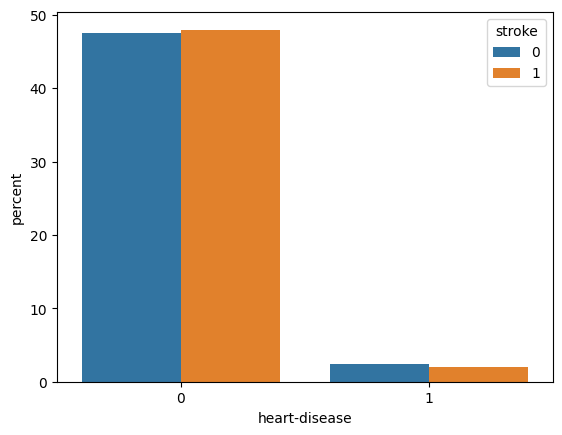

In [334]:
sns.countplot(x='heart-disease', hue='stroke', data=df_balanced, stat='percent')

The fact that the heart disesase class seem not to contribute significantly to the model is also observed in the paper. The authors explain it as a possible consequence of the lack of screening. When hearth diseases are not found, they can not be acted on.

<AxesSubplot:xlabel='smoking-status', ylabel='percent'>

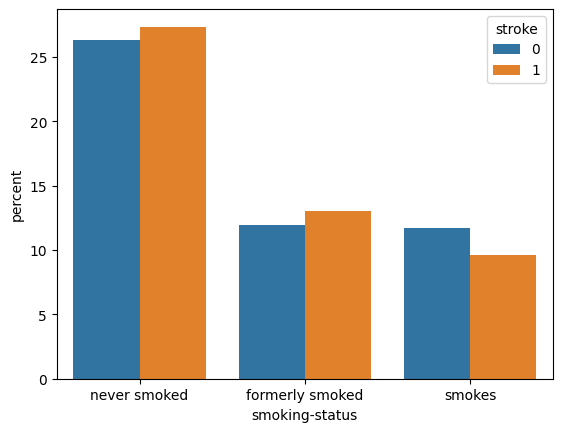

In [335]:
sns.countplot(x='smoking-status', hue='stroke', data=df_balanced, stat='percent')

<AxesSubplot:xlabel='bmi_bucket', ylabel='percent'>

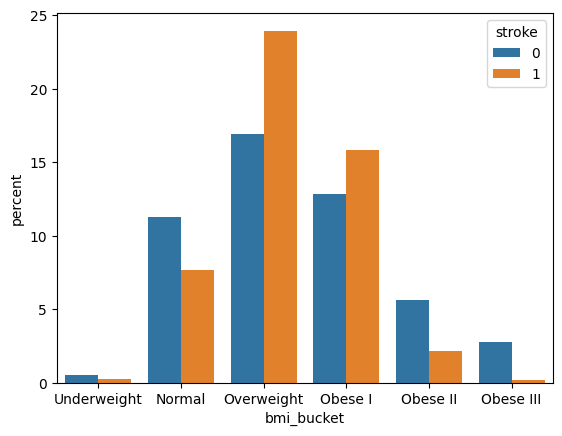

In [336]:
bmi_labels = ['Underweight', 'Normal', 'Overweight', 'Obese I', 'Obese II', 'Obese III']
dataset_bal_copy['bmi_bucket'] = pd.cut(dataset_bal_copy['bmi'], bins=[0, 18.5, 24.9, 29.9, 34.9, 39.9, 100], labels=bmi_labels)
sns.countplot(x='bmi_bucket', hue='stroke',order=bmi_labels,  data=dataset_bal_copy, stat='percent')

<AxesSubplot:xlabel='Residence-type', ylabel='percent'>

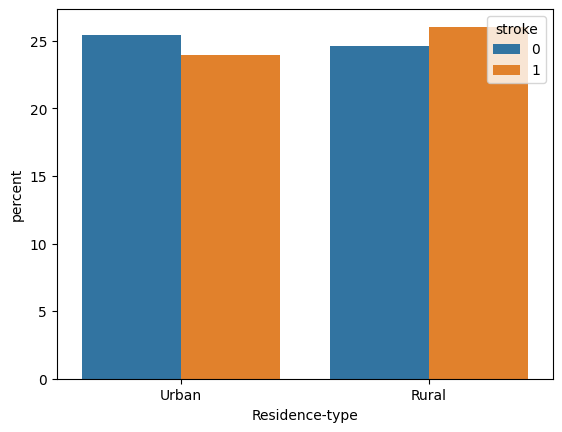

In [337]:
sns.countplot(x='Residence-type', hue='stroke', data=df_balanced, stat='percent')

<AxesSubplot:xlabel='work-type', ylabel='percent'>

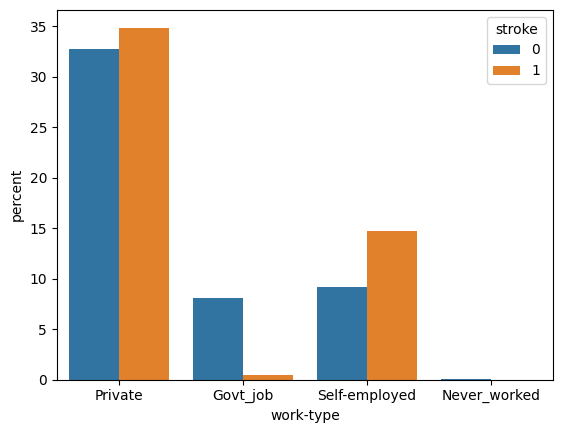

In [338]:
sns.countplot(x='work-type', hue='stroke', data=df_balanced, stat='percent')

The private sector seems to have a higher number of stroke patients.

<AxesSubplot:xlabel='gender', ylabel='percent'>

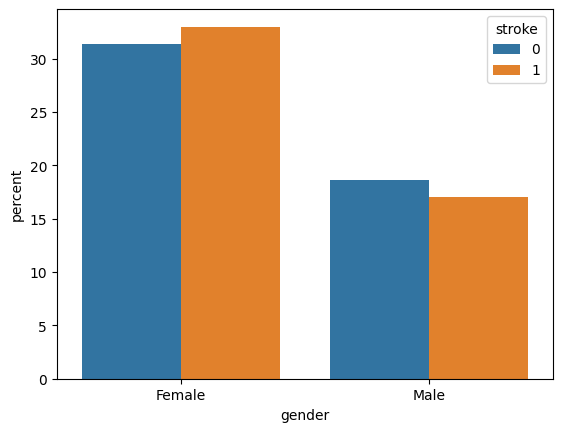

In [339]:
sns.countplot(x='gender', hue='stroke', data=df_balanced, stat='percent')

Before proceding, we may also visualize the features correlation with a heatmap

In [340]:
df_balanced.head()

,gender,age,hypertension,heart-disease,ever-married,work-type,Residence-type,avg-glucose-level,bmi,smoking-status,stroke
0,Female,18.0,0,0,No,Private,Urban,123.66,22.2,never smoked,0
1,Female,21.0,0,0,No,Private,Rural,107.98,26.9,never smoked,0
2,Male,81.0,0,0,Yes,Private,Rural,92.96,22.2,never smoked,0
3,Female,73.0,0,0,No,Govt_job,Urban,62.99,25.4,formerly smoked,0
4,Female,44.0,0,0,Yes,Private,Urban,84.07,21.2,smokes,0


By plotting the correlation between the features, we can see that there is no strong correlation between the features. This is good because it means that the features are independent of each other.

## Feature Ranking

In [341]:
X_train.head()

,gender,age,hypertension,heart-disease,ever-married,work-type,Residence-type,avg-glucose-level,bmi,smoking-status
0,Female,18.0,0,0,No,Private,Urban,123.66,22.2,never smoked
1,Female,21.0,0,0,No,Private,Rural,107.98,26.9,never smoked
2,Male,81.0,0,0,Yes,Private,Rural,92.96,22.2,never smoked
3,Female,73.0,0,0,No,Govt_job,Urban,62.99,25.4,formerly smoked
4,Female,44.0,0,0,Yes,Private,Urban,84.07,21.2,smokes


<AxesSubplot:xlabel='stroke', ylabel='count'>

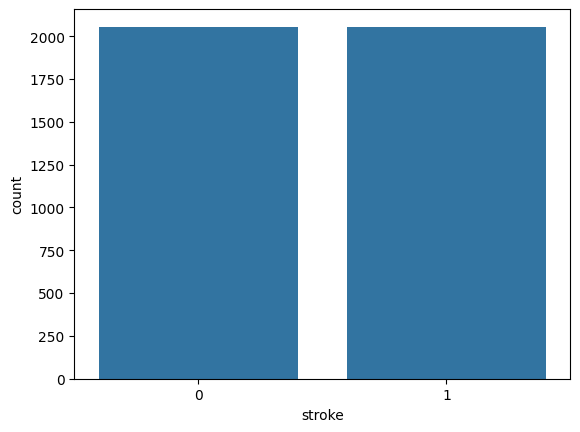

In [342]:
df_train = X_train.copy()
df_train['stroke'] = y_train

sns.countplot(x='stroke', data=df_train)

### Apply the random forest classifier to select the most important features

We start with the preprocessing part

In [343]:
X_tmp = X_train.copy()
y_tmp = y_train.copy()

# Apply one hot encoding to cathegorical features
dummies = pd.get_dummies(X_tmp[cathegorical_features]) 
X_tmp = X_tmp.drop(cathegorical_features, axis=1)
X_tmp = pd.concat([X_tmp, dummies], axis=1)

tmp_features = X_tmp.columns

# Apply ordinal encoding to binary features
oe = OrdinalEncoder()
X_tmp[binary_features] = oe.fit_transform(X_tmp[binary_features])

# Normalize the data
scaler = RobustScaler()
X_tmp = scaler.fit_transform(X_tmp)

We procede training the random forest classifier

{'heart-disease': 0.015038584388860646, 'hypertension': 0.0190152626787541, 'gender': 0.02527072034326017, 'Residence-type': 0.03232200658082316, 'smoking-status': 0.04540645075793953, 'ever-married': 0.06622340353774733, 'work-type': 0.07619685341836262, 'bmi': 0.1667414448529691, 'avg-glucose-level': 0.181665735891963, 'age': 0.3721195375493205}


<BarContainer object of 10 artists>

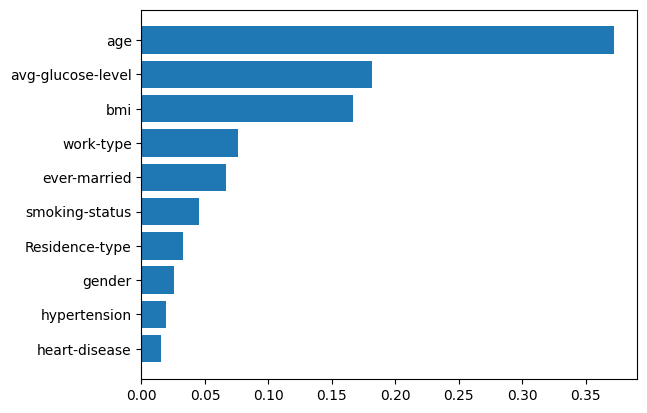

In [344]:
from sklearn.ensemble import RandomForestClassifier

dataset_features = df.columns[:-1]

rf_classifier = RandomForestClassifier(random_state=42)

importances = dict()
for f in dataset_features:
    importances[f] = 0

rf_classifier.fit(X_tmp, y_train)

feature_importance = list(zip(tmp_features, rf_classifier.feature_importances_))

for f in dataset_features:
    for f2, imp in feature_importance:
        if f in f2:
            importances[f] += imp
    

importances = dict(sorted(importances.items(), key=lambda item: item[1]))
print(importances)    
plt.barh([k for k, _ in importances.items()],[v for _, v in importances.items()])

We continue with the feature ranking

{'gender': 0.0, 'hypertension': 0.0, 'Residence-type': 0.0, 'heart-disease': 0.011583510084713922, 'smoking-status': 0.013393423336974575, 'avg-glucose-level': 0.027325911520643897, 'work-type': 0.07151152024763485, 'ever-married': 0.08291868306727657, 'bmi': 0.41095509256786245, 'age': 0.4877475500343038}


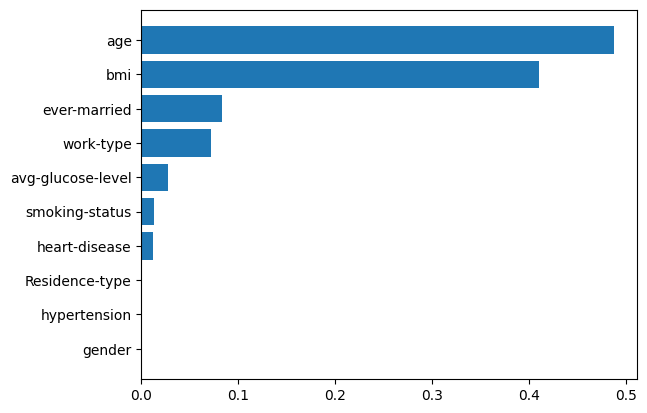

In [345]:
from sklearn.feature_selection import mutual_info_classif

mi = mutual_info_classif(X_tmp, y_tmp, random_state=42)

feature_importance = list(zip(tmp_features, mi))
importances = dict()
for f in dataset_features:
    importances[f] = 0

for f in dataset_features:
    for f2, imp in feature_importance:
        if f in f2:
            importances[f] += imp


importances = dict(sorted(importances.items(), key=lambda item: item[1]))            
plt.barh([k for k, _ in importances.items()],[v for _, v in importances.items()])
print(importances)

Both models predict Age to be the the most influent feature in the prediction of stroke. This is consistent with the paper. Also hypertension is among the least important features in both models. This is also consistent with the paper.

## Model training

In this section we will train each model, as specified by the paper and we will compute the specified metrics.

In [346]:
# metrics list
confusion_matrices = dict()
cross_val_scores_mean = dict()
accuracy = dict()
precision = dict()
recall = dict()

F_metric = dict()
auc_score = dict()

In [347]:
print(X_train.shape)
X_train.head()

(4110, 10)


,gender,age,hypertension,heart-disease,ever-married,work-type,Residence-type,avg-glucose-level,bmi,smoking-status
0,Female,18.0,0,0,No,Private,Urban,123.66,22.2,never smoked
1,Female,21.0,0,0,No,Private,Rural,107.98,26.9,never smoked
2,Male,81.0,0,0,Yes,Private,Rural,92.96,22.2,never smoked
3,Female,73.0,0,0,No,Govt_job,Urban,62.99,25.4,formerly smoked
4,Female,44.0,0,0,Yes,Private,Urban,84.07,21.2,smokes


In [348]:
print(X_test.shape)
X_test.head()

(540, 10)


,gender,age,hypertension,heart-disease,ever-married,work-type,Residence-type,avg-glucose-level,bmi,smoking-status
1979,Male,44.0,0,0,No,Private,Urban,103.44,28.0,never smoked
4828,Male,32.0,0,0,Yes,Govt_job,Rural,83.01,25.8,smokes
3003,Female,35.0,0,0,No,Private,Rural,74.53,24.6,never smoked
4135,Male,72.0,0,0,Yes,Self-employed,Urban,123.08,25.4,smokes
4749,Female,55.0,0,0,Yes,Private,Urban,59.36,34.1,smokes


In [349]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier, VotingClassifier

processor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('bool', OrdinalEncoder(), binary_features),
        ('cat', OneHotEncoder(categories=[['Private', 'Self-employed', 'Govt_job', 'Never_worked'], ['smokes', 'never smoked', 'formerly smoked']]), cathegorical_features)])

scaler = ColumnTransformer(
    transformers=[
        ('num_scale', StandardScaler(), [1, 7, 8])
    ],
    remainder='passthrough')

grid_models = [
               ('Naive Bayes', GaussianNB(),[{'var_smoothing': [1e-08, 1e-07, 1e-06]}]),
               ('Logistic Regression', LogisticRegression(),[{'C':[0.25,0.5,0.75,1],'random_state':[0], 'solver': ['newton-cg', 'lbfgs', 'liblinear'], 'max_iter':[1000]}]),
               ('SGD', SGDClassifier(), [{'loss': ['hinge', 'log_loss', 'modified_huber'],'penalty': ['l2', 'l1', 'elasticnet'],'alpha': [0.0001, 0.001, 0.01, 0.1]}]),
               ('KNN', KNeighborsClassifier(),[{'n_neighbors':[3,5,7,8,10], 'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski'], 'weights': ['uniform', 'distance']}]), 
               ('Decision Tree', DecisionTreeClassifier(),[{'criterion':['gini','entropy'],'random_state':[0]}]), 
               ('Random Forest', RandomForestClassifier(),[{'n_estimators':[100,150,200],'criterion':['gini','entropy'],'random_state':[0]}]),
               ('MLP', MLPClassifier(),[{'hidden_layer_sizes':[(10,),(20,), (25,)],'max_iter':[500],'learning_rate':['constant'], 'learning_rate_init':[0.003, 0.03, 0.3], 'momentum':[0.02,0.2], 'activation': ['relu', 'tanh']}])
               ]

# dictionary to store the trained models, with the best hyperparameters
models = dict()

for k, m, param_grid in grid_models:
    grid = GridSearchCV(estimator=m, param_grid = param_grid, scoring = 'f1', cv = 10, refit=True) # f1 score is used as scoring metric, because it is the harmonic mean of precision and recall

    pipeline = Pipeline([
        ('processor', processor),
        ('scaler', scaler),
        ('model', grid)
    ])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    best_accuracy = grid.best_score_
    best_param = grid.best_params_

    cross_val_scores_mean[k] = best_accuracy

    confusion_matrices[k] = confusion_matrix(y_test, y_pred)
    accuracy[k] = accuracy_score(y_test, y_pred)
    precision[k] = precision_score(y_test, y_pred)
    recall[k] = recall_score(y_test, y_pred)
    F_metric[k] = f1_score(y_test, y_pred)
    auc_score[k] = roc_auc_score(y_test, y_pred)

    models[k] = pipeline  # save the model with the best hyperparameters

    print('{}:\nBest Accuracy : {:.2f}%'.format(k,best_accuracy*100))
    print('Best Parameters : ',best_param)
    print("10-fold cross validation score: ", cross_val_scores_mean[k])
    print("Accuracy: ", accuracy[k])
    print("Precision: ", precision[k])
    print("Recall: ", recall[k])
    print("F1 score: ", F_metric[k])
    print("AUC: ", auc_score[k])
    print('')
    print(classification_report(y_test, y_pred))
    print('----------------')
    print('')

Naive Bayes:
Best Accuracy : 76.97%
Best Parameters :  {'var_smoothing': 1e-06}
10-fold cross validation score:  0.7696568279170551
Accuracy:  0.4740740740740741
Precision:  0.04513888888888889
Recall:  0.5909090909090909
F1 score:  0.08387096774193549
AUC:  0.53001053001053

              precision    recall  f1-score   support

           0       0.96      0.47      0.63       518
           1       0.05      0.59      0.08        22

    accuracy                           0.47       540
   macro avg       0.50      0.53      0.36       540
weighted avg       0.93      0.47      0.61       540

----------------

Logistic Regression:
Best Accuracy : 77.99%
Best Parameters :  {'C': 0.25, 'max_iter': 1000, 'random_state': 0, 'solver': 'liblinear'}
10-fold cross validation score:  0.7799178500858882
Accuracy:  0.7333333333333333
Precision:  0.0821917808219178
Recall:  0.5454545454545454
F1 score:  0.14285714285714285
AUC:  0.6433836433836434

              precision    recall  f1-score  

In [350]:
models_optimal = {
    'Naive Bayes': GaussianNB(var_smoothing=1e-07),
    'Logistic Regression': LogisticRegression(C=0.25, random_state=0, solver='liblinear', max_iter=1000),
    'SGD': SGDClassifier(alpha=0.1, loss='hinge', penalty='l2'),
    'KNN': KNeighborsClassifier(metric='manhattan', n_neighbors=3, weights='distance'),
    'Decision Tree': DecisionTreeClassifier(criterion='entropy', random_state=0),
    'Random Forest': RandomForestClassifier(random_state=0, criterion='entropy', n_estimators=200),
    'MLP': MLPClassifier(learning_rate='constant', learning_rate_init=0.003, momentum=0.2, activation='tanh', max_iter=500, hidden_layer_sizes=(25,))
}

In [351]:
# define the base models
base_models_stacking = [
    ('rf', RandomForestClassifier(criterion='gini', n_estimators=200, random_state=0)),
    ('nb', GaussianNB(var_smoothing=1e-07)),
    ('dt1', DecisionTreeClassifier(criterion='gini', random_state=0)),
    ('dt2', DecisionTreeClassifier(criterion='entropy', random_state=0)),
]
base_models_voting = [
    ('rf', RandomForestClassifier(criterion='gini', n_estimators=200, random_state=0)),
    ('dt1', DecisionTreeClassifier(criterion='gini', random_state=0)),
    ('dt2', DecisionTreeClassifier(criterion='entropy', random_state=0)),
]

# Define the meta-model for stacking
meta_model = LogisticRegression(C=0.75, random_state=0, solver='lbfgs', max_iter=500)

stacking = StackingClassifier(estimators=base_models_stacking, final_estimator=meta_model, cv=10)
voting = VotingClassifier(estimators=base_models_voting, voting='hard') # in the paper the voting is hard

pipeline_stack = Pipeline([
        ('processor', processor),
        ('scaler', scaler),
        ('model', stacking)
    ])

pipeline_vote = Pipeline([
        ('processor', processor),
        ('scaler', scaler),
        ('model', voting)
    ])


# Evaluating the stacking method
models['stacking'] = pipeline_stack.fit(X_train, y_train)

y_pred = pipeline_stack.predict(X_test)

cross_val_scores_mean['stacking'] = cross_val_score(pipeline_stack, X_train, y_train, cv=10).mean()

confusion_matrices['stacking'] = confusion_matrix(y_test, y_pred)
accuracy['stacking'] = accuracy_score(y_test, y_pred)
precision['stacking'] = precision_score(y_test, y_pred)
recall['stacking'] = recall_score(y_test, y_pred)
F_metric['stacking'] = f1_score(y_test, y_pred)
auc_score['stacking'] = roc_auc_score(y_test, y_pred)

print("Model: Stacking")
print("10-fold cross validation score: ", cross_val_scores_mean['stacking'])
print("Accuracy: ", accuracy['stacking'])
print("Precision: ", precision['stacking'])
print("Recall: ", recall['stacking'])
print("F1 score: ", F_metric['stacking'])
print("AUC: ", auc_score['stacking'])


# Evaluating the Majority voting
models['voting'] = pipeline_vote.fit(X_train, y_train)

y_pred = pipeline_vote.predict(X_test)

cross_val_scores_mean['voting'] = cross_val_score(pipeline_vote, X_train, y_train, cv=10).mean()

confusion_matrices['voting'] = confusion_matrix(y_test, y_pred)
accuracy['voting'] = accuracy_score(y_test, y_pred)
precision['voting'] = precision_score(y_test, y_pred)
recall['voting'] = recall_score(y_test, y_pred)
F_metric['voting'] = f1_score(y_test, y_pred)
auc_score['voting'] = roc_auc_score(y_test, y_pred)

print("Model: Majority Voting")
print("10-fold cross validation score: ", cross_val_scores_mean['voting'])
print("Accuracy: ", accuracy['voting'])
print("Precision: ", precision['voting'])
print("Recall: ", recall['voting'])
print("F1 score: ", F_metric['voting'])
print("AUC: ", auc_score['voting'])

Model: Stacking
10-fold cross validation score:  0.9425790754257907
Accuracy:  0.9148148148148149
Precision:  0.1
Recall:  0.13636363636363635
F1 score:  0.11538461538461539
AUC:  0.5421200421200421
Model: Majority Voting
10-fold cross validation score:  0.9201946472019464
Accuracy:  0.8796296296296297
Precision:  0.0784313725490196
Recall:  0.18181818181818182
F1 score:  0.1095890410958904
AUC:  0.5455422955422955


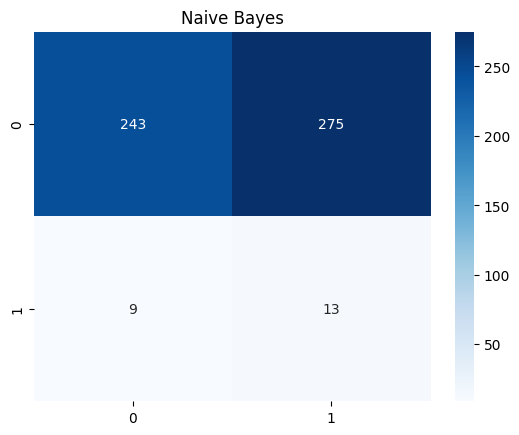

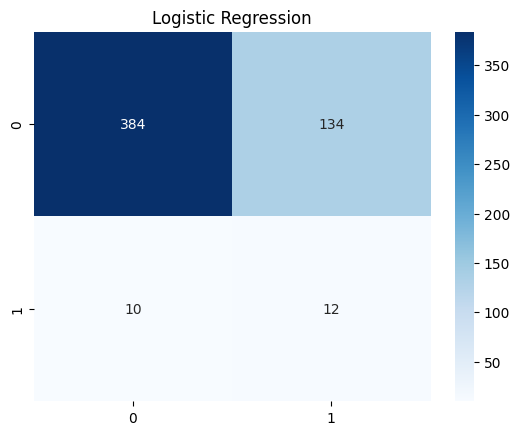

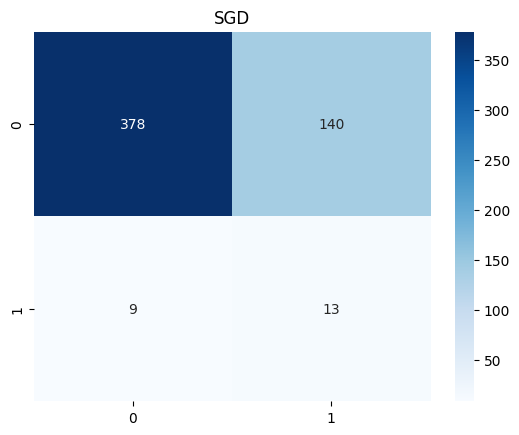

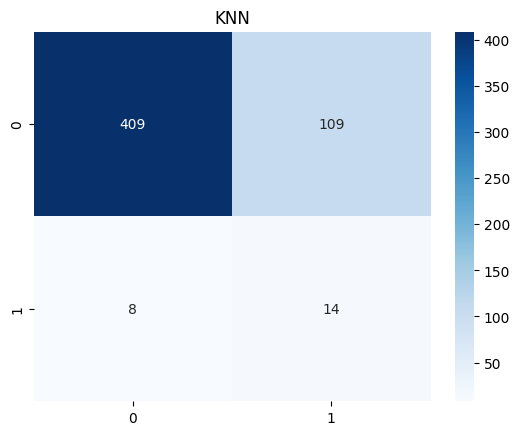

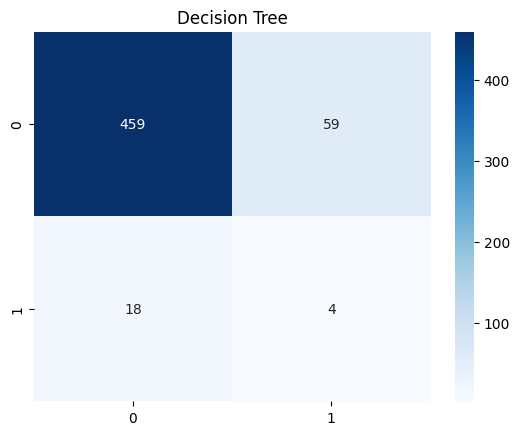

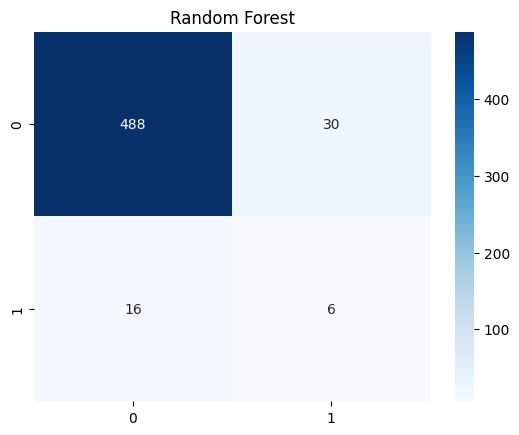

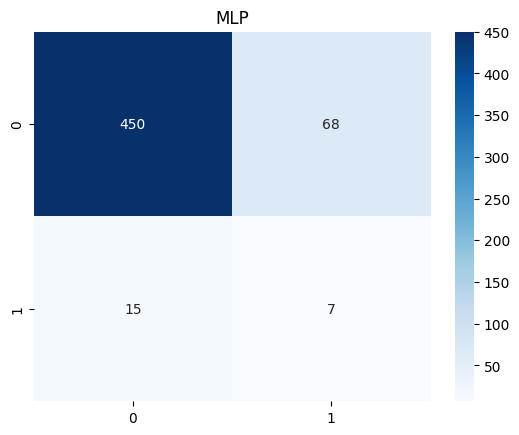

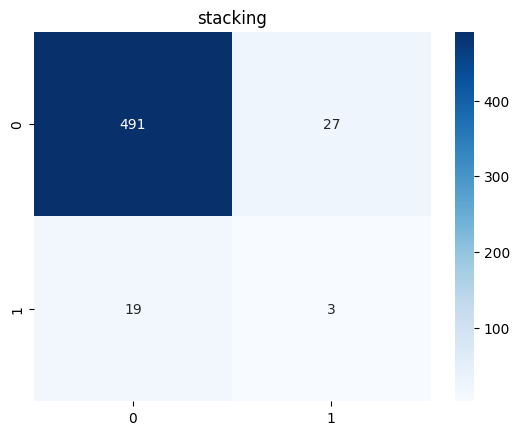

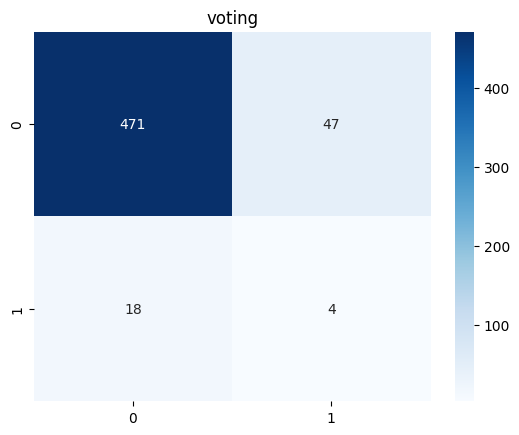

In [352]:
for k, m in confusion_matrices.items():
    plt.figure()
    plt.title(k)
    sns.heatmap(m, annot=True, fmt='d', cmap='Blues')

The following confusion matrices make us realize that the models are not performing well. This is because the dataset that we have been using is imbalanced, and while we have balanced it for the training phase, in the prediction phase, when the data used for testing remains unbalanced, the models are not able to predict the stroke cases correctly and produce many false negatives.

Text(0.5, 1.0, 'AUC')

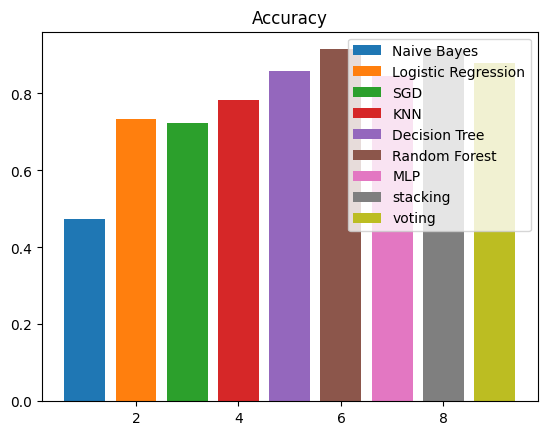

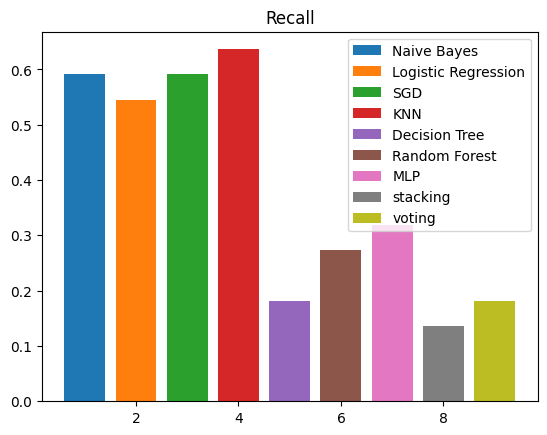

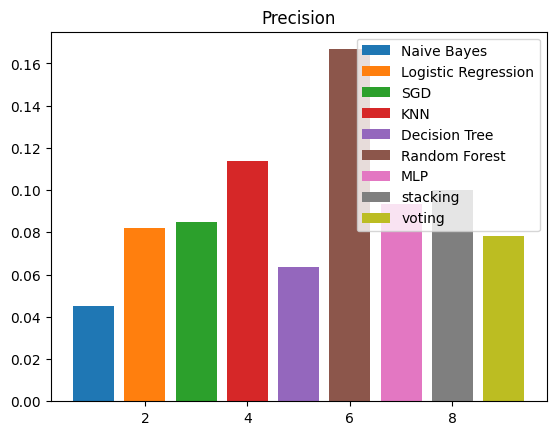

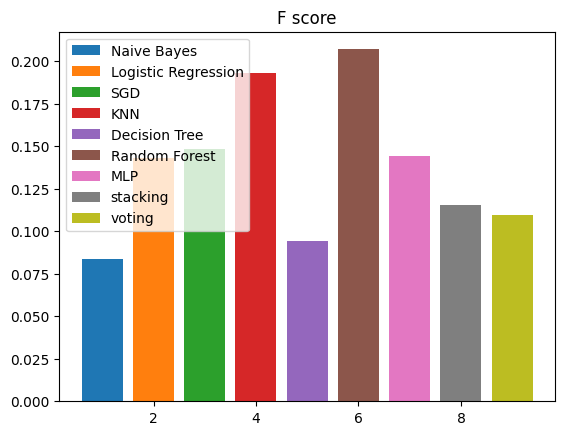

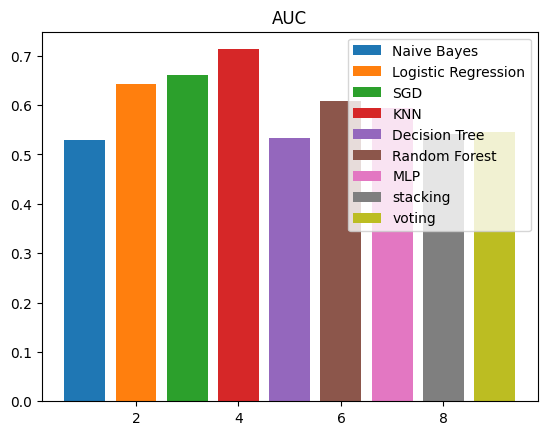

In [354]:
## Accuracy
plt.figure()
i=1
for k, v in accuracy.items():
    plt.bar(i, v, label = k)
    i+=1

plt.legend()
plt.title("Accuracy")

## Recall
plt.figure()
i=1
for k, v in recall.items():
    plt.bar(i, v, label = k)
    i+=1

plt.legend()
plt.title("Recall")

## Precision
plt.figure()
i=1
for k, v in precision.items():
    plt.bar(i, v, label = k)
    i+=1

plt.legend()
plt.title("Precision")

## F score
plt.figure()
i=1
for k, v in F_metric.items():
    plt.bar(i, v, label = k)
    i+=1

plt.legend()
plt.title("F score")

## AUC
plt.figure()
i=1
for k, v in auc_score.items():
    plt.bar(i, v, label = k)
    i+=1

plt.legend()
plt.title("AUC")

In [355]:
model_matrix = dict()

for k in models.keys():
    model_matrix[k] = list()
    model_matrix[k].append(cross_val_scores_mean[k])
    model_matrix[k].append(accuracy[k])
    model_matrix[k].append(precision[k])
    model_matrix[k].append(recall[k])
    model_matrix[k].append(F_metric[k])
    model_matrix[k].append(auc_score[k])


pd.DataFrame(model_matrix, index=['cross validation', 'accuracy', 'precision', 'recall', 'F1 score', 'AUC']).T

,cross validation,accuracy,precision,recall,F1 score,AUC
Naive Bayes,0.769657,0.474074,0.045139,0.590909,0.083871,0.530011
Logistic Regression,0.779918,0.733333,0.082192,0.545455,0.142857,0.643384
SGD,0.769030,0.724074,0.084967,0.590909,0.148571,0.660319
KNN,0.886520,0.783333,0.113821,0.636364,0.193103,0.712969
Decision Tree,0.894594,0.857407,0.063492,0.181818,0.094118,0.533959
Random Forest,0.938802,0.914815,0.166667,0.272727,0.206897,0.607406
MLP,0.876315,0.846296,0.093333,0.318182,0.144330,0.593454
stacking,0.942579,0.914815,0.100000,0.136364,0.115385,0.542120
voting,0.920195,0.879630,0.078431,0.181818,0.109589,0.545542
